# Black Friday Sales

In [285]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

In [286]:
#pip install pandas-profiling

In [287]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os

import scipy as sp
import pandas_profiling

import matplotlib.pyplot as plt
import seaborn as sns

import pandas_profiling as pf
from pandas_profiling import ProfileReport

from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import make_scorer, accuracy_score #accuracy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV #hyper parameter optimization
from sklearn.metrics import confusion_matrix #accuracy
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [288]:
data = pd.read_csv('C:/Users/Hp/Desktop/Imarticus/Dataset/black-friday/train.csv')

In [123]:
#profile = ProfileReport(data, title='Pandas Profiling Report', html={'style':{'full_width':True}})

In [124]:
profile = ProfileReport(data, minimal=True)
#profile.to_file(output_file="output.html")

In [125]:
profile

In [126]:
#Let see the first five rows of the dataset
data.head()

#Lets see some statistics about the data
data.describe()

#Lets see present total Nans in each column
data.isnull().sum()

data.shape

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

(550068, 12)

In [289]:
missing_values = data.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]/data.shape[0]
print(f'{missing_values *100} %')

Product_Category_3    69.672659
Product_Category_2    31.566643
dtype: float64 %


The column Product_Category_2 posses around 30% of missing data. Here it makes sense to fill missing values.
Whereas, the column Product_Category_3 posses around 70% of missing data. So, here the missing values are being imputed by 0.

30% of real data is a small ratio, we could fill missing values inside this category with the mean of the existing values, but that means that 70% of data will be artificial, which could ruin our future machine learning model. 

In [294]:
#data=data.fillna(0)
data['Product_Category_2'].fillna((data['Product_Category_2'].mean()), inplace=True)
data['Product_Category_3']=data['Product_Category_3'].fillna(0)

In [295]:
data.isnull().sum().sum()

0

In [231]:
print('Unique Values for Each Feature: \n')
for i in data.columns:
    print(i, ':',data[i].nunique())

Unique Values for Each Feature: 

User_ID : 5891
Product_ID : 3631
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 20
Product_Category_2 : 18
Product_Category_3 : 16
Purchase : 18105


In [132]:
# Info about products
print('Number of products:',data['Product_ID'].nunique())
print('Number of categories:',data['Product_Category_1'].unique().max())

Number of products: 3631
Number of categories: 20


In [133]:
print('Number of shoppers:',data['User_ID'].nunique())
print('Years in city:',data['Stay_In_Current_City_Years'].unique())
print('Age Groups:',data['Age'].unique())

Number of shoppers: 5891
Years in city: ['2' '4+' '3' '1' '0']
Age Groups: ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']


Looking at the data, we can conclude that our set possesses 12 different parameters: 7 numerical (integer and float) and 5 object variables. Furthermore, the dataset contains two short type variables: Product_Category_2 and Product_Category_3.

# Exploring the data for insights

### 1. Gender and age

M    414259
F    135809
Name: Gender, dtype: int64

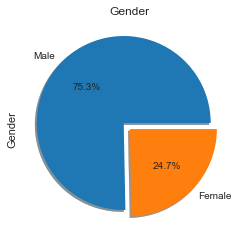

In [134]:
count_gender=data["Gender"].value_counts()
count_gender
data["Gender"].value_counts().plot.pie(title="Gender", explode=(0.1, 0), 
                                       labels=["Male", "Female"], autopct="%1.1f%%", shadow=True)

The graph shows that there are almost 3 times more male customers than female customers!
Maybe male visitors are more likely to go out and buy something for their ladies when more deals are present.

Let's explore the Gender category a bit more. We want to see now distribution of gender variable, but taking into consideration the Age category. Once again countplot function will be used, but now with defined hue parameter.

In [135]:
data['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

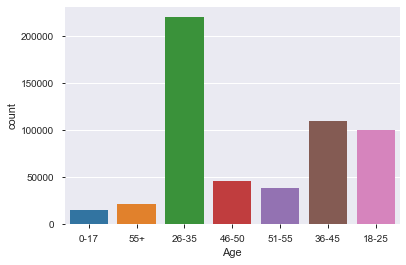

In [136]:
data['Age'].value_counts()
sns.countplot(data['Age'])

Text(0.5, 1.0, 'Age&Gender')

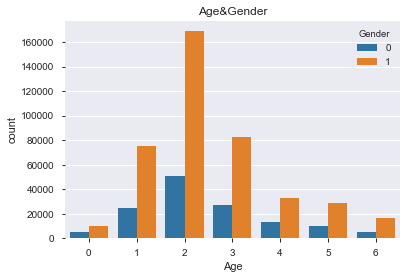

In [158]:
sns.countplot(data["Age"], hue=data["Gender"]).set_title("Age&Gender")

From the age and gender figures, we can see several interesting things. First of all, the main customers for black friday sale are male(over 70 percent), especially those of age 26-35, who account for almost one third of male cuntomers of all ages. 

From the figure above, we can easily conclude that the highest number of customers belong to the age group between 26 and 35, for both genders. Younger and older population are far less represented on Black Friday. Based on these results, the retail store should sell most of the products that target people in their late twenties to early thirties. To increase profits, the number of products targeting people around their thirties can be increased while the number of products that target the older or younger population can be reduced.

([<matplotlib.axis.XTick at 0x1fcd7f26608>,
 <a list of 2 Text xticklabel objects>)

Text(0.5, 1.0, 'Mean purchase of different gender')

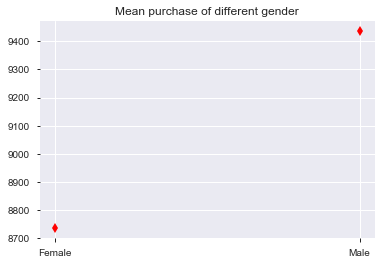

In [138]:
x = data.groupby(["Gender"]).mean()[["Purchase"]].index
y = data.groupby(["Gender"]).mean()[["Purchase"]].values
plt.plot(x, y,'rd')
plt.xticks(x, ["Female", "Male"])
plt.title("Mean purchase of different gender")
sns.despine()

Secondly, the figure of mean purchase of different gender shows that individual male customer also spends more than their female counterpart. 

In spite of gender, people between age of 18 and 45 have made up the most of black friday sales. 

Young men showed greater purchasing power overall, but it's also possible that male customers are paying when shopping together with females.

### 2.User ID

In [160]:
data['User_ID'].nunique()
data['Product_ID'].nunique()

5891

3631

we analyze the User_ID column using the nunique method. From this we can conclude that in this specific retail store, during Black Friday, 5,891 different customers have bought something from the store. Also, from Product_ID category we can extract information that 3,631 different products are sold.

### 3. City

City_Category variable is the next one. This category gives us information about cities from which our customers are.

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

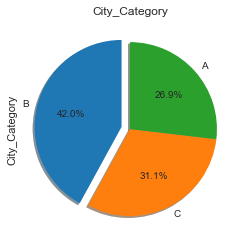

In [139]:
city_count=data["City_Category"].value_counts()
city_count
city_count.plot.pie(title="City_Category", 
                        startangle=90, explode=(0.1, 0, 0), autopct="%1.1f%%", shadow=True)

It is evident from the pie chart that all the three cities are almost equally represented in the retail store during Black Fridays. Maybe the store is somewhere between these three cities, is easily accessible and has good road connections from these cities.

In [140]:
#Purchase city wise
citygroup=data.groupby("City_Category")["Purchase"].sum()
citygroup

City_Category
A    1316471661
B    2115533605
C    1663807476
Name: Purchase, dtype: int64

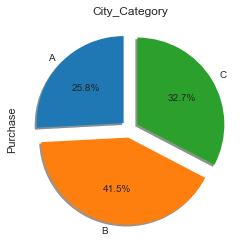

In [141]:
citygroup.plot.pie(title="City_Category", startangle=90, explode=(0.1, 0.1, 0.1), autopct="%1.1f%%", shadow=True)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

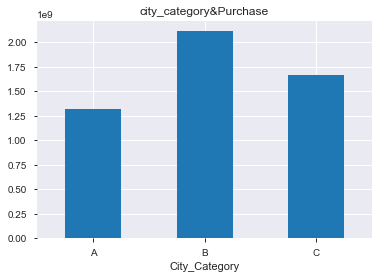

In [162]:
citygroup.plot.bar(title="city_category&Purchase")
plt.xticks(rotation=360)
sns.despine()

Text(0.5, 1.0, 'Mean purchase of different city categories')

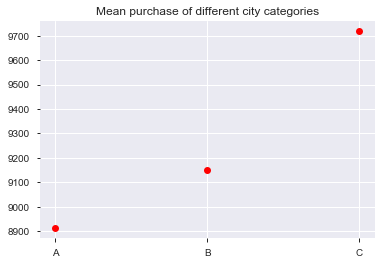

In [143]:
x = data.groupby(["City_Category"]).mean()[["Purchase"]].index
y = data.groupby(["City_Category"]).mean()[["Purchase"]].values
plt.plot(x, y,"ro")
plt.title("Mean purchase of different city categories")
sns.despine()

Customers from C_category cities make up more than half of our black friday sales. 
Surprisingly, although there are not very many customers from B_type city. 
On the contrary, we didn't get very many customers from A_type city and they spent the least in our store. 
This can be noted when making future marketing plans.

### 4.Occupation

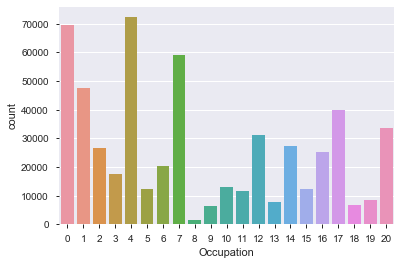

In [144]:
sns.countplot(data['Occupation'])

<BarContainer object of 21 artists>

([<matplotlib.axis.XTick at 0x1fcd94c2788>,
 <a list of 21 Text xticklabel objects>)

Text(0, 0.5, 'Purchase amount')

Text(0.5, 1.0, 'Occupation ID')

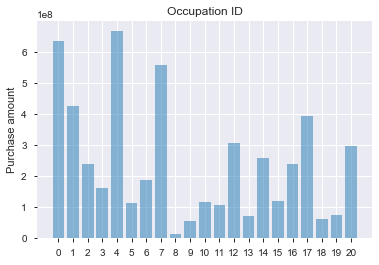

In [166]:
#Purchase Occupation wise
occupation_group=data.groupby("Occupation")["Purchase"].sum()
#occupation_group
objects = ('0', '1', '2', '3', '4', '5','6','7','8','9','10', '11','12', '13', '14', '15', '16', '17', '18', '19', '20')
y_pos = np.arange(len(objects))

plt.bar(y_pos, occupation_group, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Purchase amount')
plt.title('Occupation ID')

plt.show()

### 5. Marital_Status

In [145]:
data['Marital_Status'].value_counts()
#0 for single, 1 for married

0    324731
1    225337
Name: Marital_Status, dtype: int64

Text(0.5, 1.0, 'Occupation Distribution')

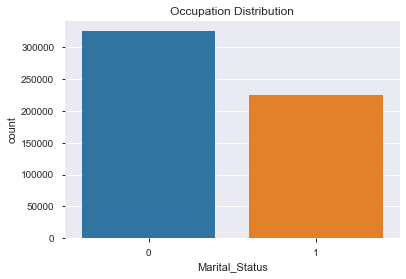

In [179]:
sns.countplot(data['Marital_Status'])
plt.title('Occupation Distribution')
plt.show()

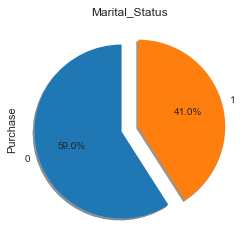

In [169]:
#Purchase Marital_Status wise
Marital_Status_group=data.groupby("Marital_Status")["Purchase"].sum()
Marital_Status_group.plot.pie(title="Marital_Status", startangle=90, explode=(0.1, 0.1), autopct="%1.1f%%", shadow=True)

In [147]:
data['Purchase'].sum()

5095812742

In [296]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,3.841941,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,4.207852,6.250712,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,0.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,8.000000,0.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.842329,0.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,14.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


### 4. Residence Stability

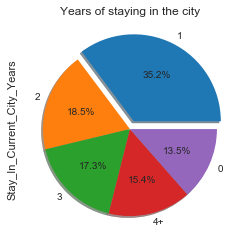

In [149]:
data["Stay_In_Current_City_Years"].value_counts().plot.pie(title="Years of staying in the city",
                                                explode=(0.1, 0, 0, 0, 0), autopct="%1.1f%%", shadow=True)

New residents(one year or less) consist of around half of our black friday customers, which shows that gthe store appears to be more popular for new comers. People who have been living in current city for longer spend a bit more than new comers. Since they chose to stay with the store, we do need to find out what kept them loyal so that better plans can be made to keep more customers instead of losing them over time.

### 5. Product

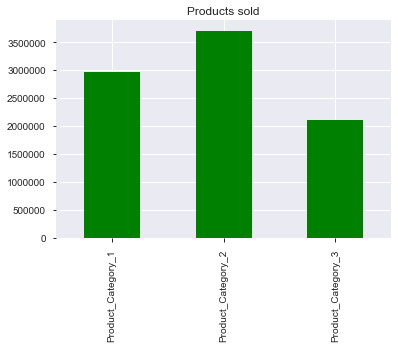

In [176]:
data.sum()[["Product_Category_1", "Product_Category_2", "Product_Category_3"]].plot.bar(title="Products sold", color="green")

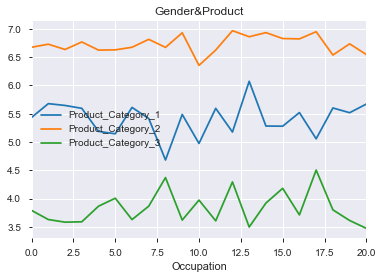

In [175]:
data.groupby(["Occupation"]).mean()[["Product_Category_1", "Product_Category_2", "Product_Category_3"]].plot.line(title="Gender&Product")

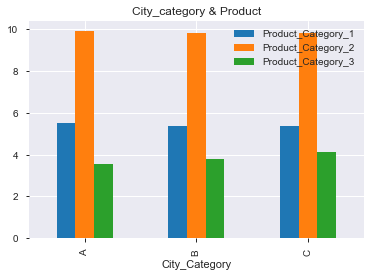

In [297]:
data.groupby(["City_Category"]).mean()[["Product_Category_1", "Product_Category_2", "Product_Category_3"]].plot.bar(title="City_category & Product")

Products under category 2 are our most popular items, and this is true for all kinds of customers coming from different backgrounds.

Above is some analysis about trends of our black friday sale as well as correlations between different demograghical features and purchase, these relationships can be valuable when trying to maximize profit. Now we will try to predict future sales with these data.

### 6.Purchase(target variable)

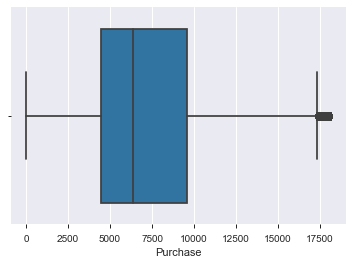

In [188]:
sns.boxplot(data['Purchase'])
plt.show()

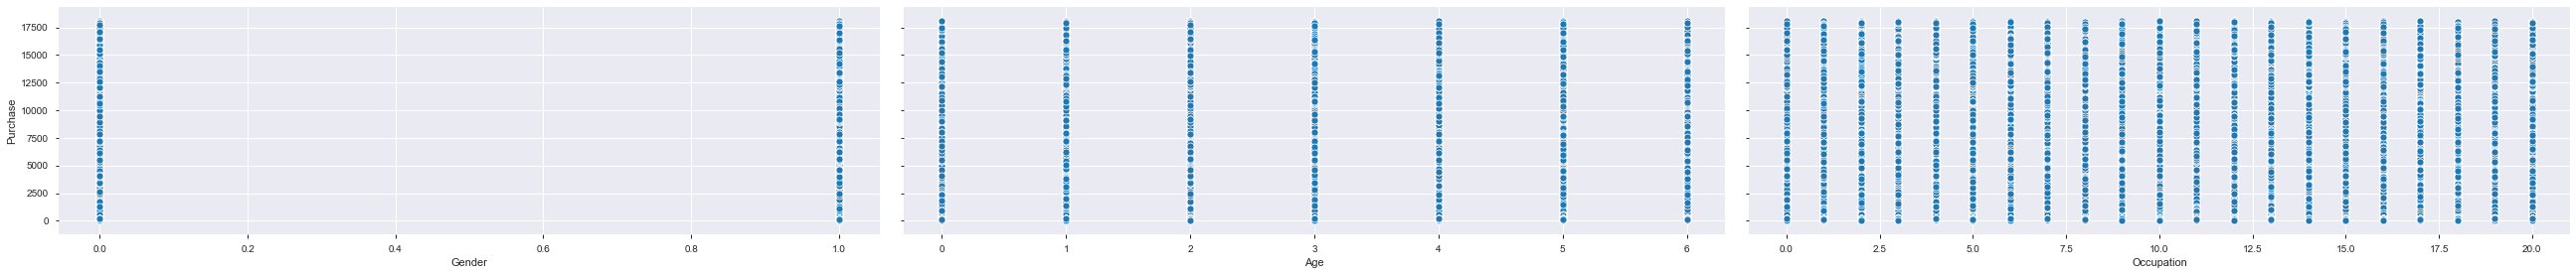

In [191]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(data, x_vars=['Gender', 'Age', 'Occupation'], y_vars='Purchase', height=4, aspect=3, kind='scatter')
plt.show()

### Predict future Sales(Purchase)

In [298]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

Text(0.5, 1, 'Correlation between features')

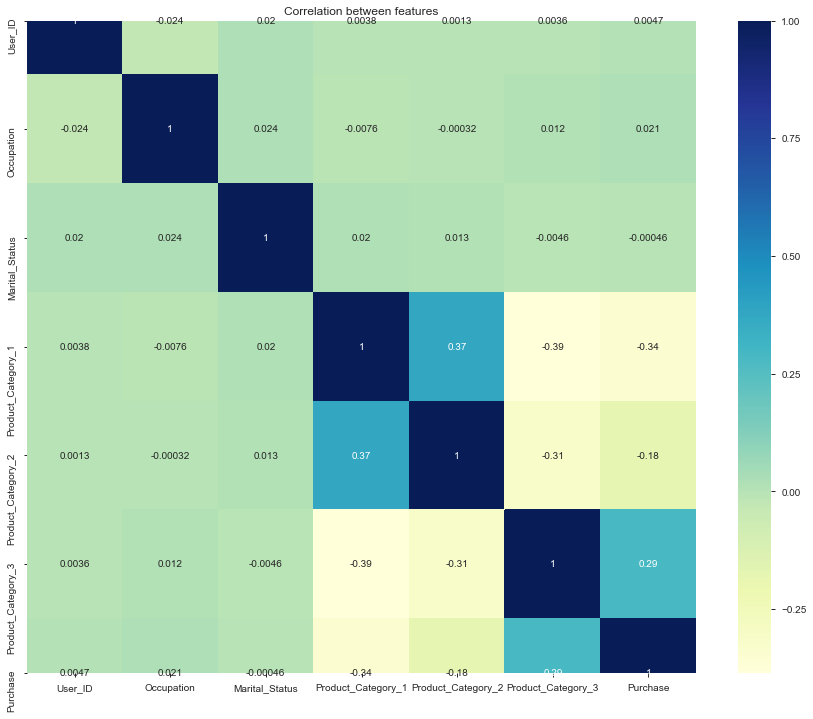

In [299]:
#data.info()
fig, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu").set_title("Correlation between features")

From the heatmap above we can observe there are strong correlations between different types' products and purchase. There is also some correlation between age and marital status which is in line with common sense. Unfortunately, there is no single feature that shows strong correlation with purchase directly, so we can understand this as that purchase depends on the ensemble of all features.

User_ID is is the number assigned automatically to each customer, and it is not useful for prediction purposes.

The Product_ID column contains information about the product purchased. It is not a feature of the customer. Therefore, we will remove that too.

In [302]:
data = data.drop(['User_ID','Product_ID'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null float64
Product_Category_3            550068 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(4), object(4)
memory usage: 42.0+ MB


In [300]:
# #Function for Label encoding as Embarked is an object here.

# def encode_features(df_train):
#     features = ['Gender', 'Age', 'City_Category','Stay_In_Current_City_Years', 'Product_Category_1',
#        'Product_Category_2', 'Product_Category_3']
#     df_combined = df_train[features].copy()
#     for feature in features:
#         le = preprocessing.LabelEncoder()
#         le = le.fit(df_combined[feature])
#         df_train[feature] = le.transform(df_train[feature])
#         #df_test[feature] = le.transform(df_test[feature])
#     return df_train
# df=encode_features(data)

df_Gender = pd.get_dummies(data['Gender'])
df_Age = pd.get_dummies(data['Age'])
df_City_Category = pd.get_dummies(data['City_Category'])
df_Stay_In_Current_City_Years = pd.get_dummies(data['Stay_In_Current_City_Years'])

data_final = pd.concat([data, df_Gender, df_Age, df_City_Category, df_Stay_In_Current_City_Years], axis=1)

data_final.head()
#data_final.info()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,51-55,55+,A,B,C,0,1,2,3,4+
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.842329,...,0,0,1,0,0,0,0,1,0,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.000000,...,0,0,1,0,0,0,0,1,0,0
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.842329,...,0,0,1,0,0,0,0,1,0,0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.000000,...,0,0,1,0,0,0,0,1,0,0
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.842329,...,0,1,0,0,1,0,0,0,0,1


In [303]:
data.columns
data_final.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'F', 'M',
       '0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+', 'A', 'B',
       'C', '0', '1', '2', '3', '4+'],
      dtype='object')

# Data Preprocessing for ML Algorithms

In [304]:
ind = data_final[['Occupation', 'Marital_Status', 'Product_Category_2', 'F', 'M', '0-17', '18-25', '26-35', 
                  '36-45', '46-50', '51-55', '55+', 'A', 'B', 'C', '0', '1', '2', '3', '4+']]
dep = data_final['Purchase']

In [305]:
#spliting dataset into 70% training set and 30% test set:

ind_train,ind_test,dep_train,dep_test=train_test_split(ind,dep,test_size=0.3, random_state=100)

## Linear Regression

In [306]:
lm = LinearRegression()
lm.fit(ind_train, dep_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [309]:
#print('Intercept parameter:', lm.intercept_)
#coeff_df = pd.DataFrame(lm.coef_, ind_train.columns, columns=['Coefficient'])
#print(coeff_df)

#Prediction with test value
linreg_prediction=lm.predict(ind_test)

df = pd.DataFrame({'Actual': dep_test, 'Predicted': linreg_prediction})
df.head()

#Accuracy
print('MAE:', metrics.mean_absolute_error(dep_test, linreg_prediction))
print('MSE:', metrics.mean_squared_error(dep_test, linreg_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(dep_test, linreg_prediction)))

accuracy = lm.score(ind_test,dep_test)
print(accuracy*100,'%')

,Actual,Predicted
343184,3051,9046.733337
544675,13692,9704.544535
433588,8592,8005.986003
123193,2761,10449.455004
161124,15918,8071.541887


MAE: 3901.123336218898
MSE: 24263235.868942652
RMSE: 4925.772616447358
4.066137351906884 %


In [315]:
#Prediction with train value
linreg_prediction=lm.predict(ind_train)

df = pd.DataFrame({'Actual': dep_train, 'Predicted': linreg_prediction})
df.head()

#Accuracy
print('MAE:', metrics.mean_absolute_error(dep_train, linreg_prediction))
print('MSE:', metrics.mean_squared_error(dep_train, linreg_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(dep_train, linreg_prediction)))

accuracy = lm.score(ind_train,dep_train)
print(accuracy*100,'%')

,Actual,Predicted
495840,4444,9849.713191
366955,5385,8126.389485
267012,3523,9434.428509
516764,15667,8209.984569
358915,20680,9810.783961


MAE: 3896.9551155729564
MSE: 24195489.99702232
RMSE: 4918.891134902491
4.005185107527942 %


# Decision Tree

In [310]:
from sklearn.tree import DecisionTreeRegressor

In [311]:
dt=DecisionTreeRegressor(random_state=1)
dt.fit(ind_train, dep_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [312]:
#Prediction with test value
dt_prediction=dt.predict(ind_test)

df = pd.DataFrame({'Actual': dep_test, 'Predicted': dt_prediction})
df.head()

#Accuracy
print('MAE:', metrics.mean_absolute_error(dep_test, dt_prediction))
print('MSE:', metrics.mean_squared_error(dep_test, dt_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(dep_test, dt_prediction)))

accuracy = dt.score(ind_test,dep_test)
print(accuracy*100,'%')

,Actual,Predicted
343184,3051,7141.092511
544675,13692,11849.071429
433588,8592,7698.250000
123193,2761,6573.537634
161124,15918,10369.916667


MAE: 3578.1974081339386
MSE: 21923322.50791346
RMSE: 4682.234777103073
13.31786816794146 %


In [319]:
#Prediction with train value
dt_prediction=dt.predict(ind_train)

df = pd.DataFrame({'Actual': dep_train, 'Predicted': dt_prediction})
df.head()

#Accuracy
print('MAE:', metrics.mean_absolute_error(dep_train, dt_prediction))
print('MSE:', metrics.mean_squared_error(dep_train, dt_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(dep_train, dt_prediction)))

accuracy = dt.score(ind_train,dep_train)
print(accuracy*100,'%')

,Actual,Predicted
495840,4444,5089.864865
366955,5385,12488.181818
267012,3523,9804.457143
516764,15667,9849.647059
358915,20680,10863.509434


MAE: 3260.0047242898404
MSE: 18389765.340660833
RMSE: 4288.328968334966
27.039207719703594 %


# Random Forest

In [313]:
rf=RandomForestRegressor()

#fit the best algorithm 
rf.fit(ind_train,dep_train)

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [314]:
#Prediction with test value
rf_prediction=rf.predict(ind_test)

df = pd.DataFrame({'Actual': dep_test, 'Predicted': rf_prediction})
df.head()

#Accuracy
print('MAE:', metrics.mean_absolute_error(dep_test, rf_prediction))
print('MSE:', metrics.mean_squared_error(dep_test, rf_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(dep_test, rf_prediction)))

accuracy = rf.score(ind_test,dep_test)
print(accuracy*100,'%')

,Actual,Predicted
343184,3051,7217.481553
544675,13692,11953.065276
433588,8592,7798.567143
123193,2761,6522.059347
161124,15918,9854.605316


MAE: 3563.7264239311417
MSE: 21631828.957457818
RMSE: 4651.003005530938
14.4703979617111 %


In [321]:
#Prediction with train value
rf_prediction=rf.predict(ind_train)

df = pd.DataFrame({'Actual': dep_train, 'Predicted': rf_prediction})
df.head()

#Accuracy
print('MAE:', metrics.mean_absolute_error(dep_train, rf_prediction))
print('MSE:', metrics.mean_squared_error(dep_train, rf_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(dep_train, rf_prediction)))

accuracy = rf.score(ind_train,dep_train)
print(accuracy*100,'%')

,Actual,Predicted
495840,4444,5050.743614
366955,5385,11578.217655
267012,3523,9199.381842
516764,15667,9924.176563
358915,20680,10904.221810


MAE: 3294.778928207598
MSE: 18588622.639146958
RMSE: 4311.4524976099365
26.250247894523703 %
